In [1]:
# !pip install python-louvain

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

import networkx as nx
import community # !pip install python-louvain ... NOT community

%matplotlib inline

In [3]:
se = pd.read_csv('data/edgelist.csv')
se.head()

,node1,node2,color,report_name
0,Oil consumption,GHG Emissions (aggregate),green,Trottier
1,LNG consumption,GHG Emissions (aggregate),green,Trottier
2,Electricity consumption,GHG Emissions (aggregate),green,Trottier
3,Biofuels consumption,Oil consumption,green,Trottier
4,Oil consumption,GHG Emissions (aggregate),green,Trottier


In [4]:
se.report_name.unique()

array(['Trottier', 'DeepDecarbon', 'NEB', 'Reenergizing', 'WEC'],
      dtype=object)

In [5]:
se4 = se[se['report_name'] != 'WEC']
se_trot = se[se['report_name'] == 'Trottier']
se_wec = se[se['report_name'] == 'WEC']

In [6]:
GSE4 = nx.from_pandas_edgelist(se4,'node1','node2',edge_attr=None)
GSE_trot = nx.from_pandas_edgelist(se_trot,'node1','node2',edge_attr=None) # Individual network for TEFP
GSE_wec = nx.from_pandas_edgelist(se_wec,'node1','node2',edge_attr=None) # Individual network for WEC global scenarios

In [7]:
import warnings
warnings.filterwarnings("ignore", module="networkx")

(-0.9286932651026462,
 1.102125772706811,
 -0.7544690239764458,
 1.0611548563767872)

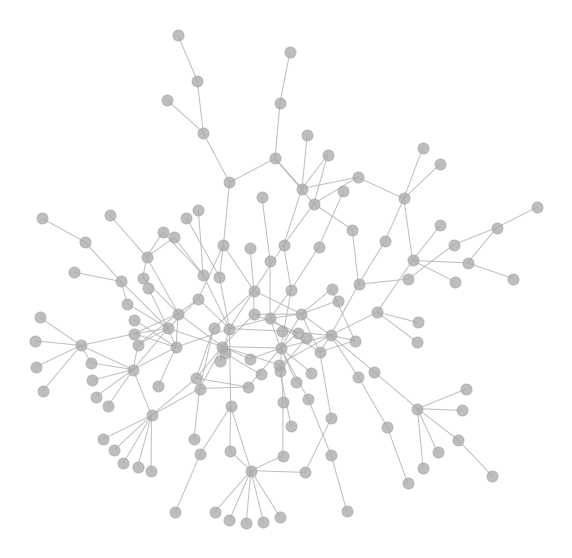

In [8]:
layout = nx.kamada_kawai_layout(GSE4)

plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray', width=1, alpha=.75)
plt.axis('off')

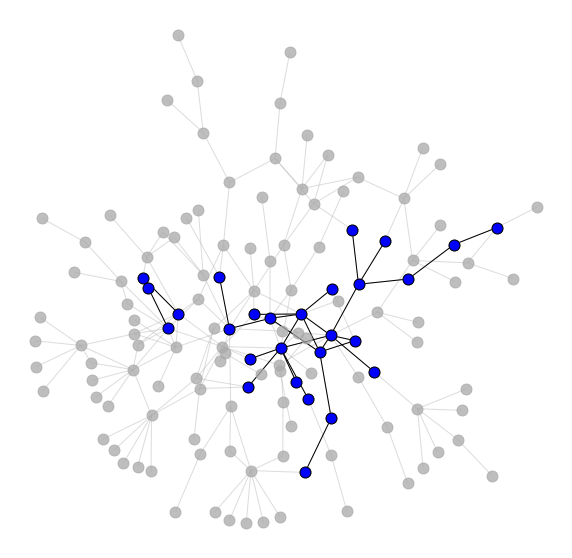

In [9]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_trot, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_trot, layout, edge_color='k',width=1)
plt.axis('off');

In [10]:
partitions = community.best_partition(GSE4, randomize=False)

In [11]:
partitions

{'Oil consumption': 0,
 'GHG Emissions (aggregate)': 0,
 'LNG consumption': 0,
 'Electricity consumption': 0,
 'Biofuels consumption': 0,
 'Oil demand (global)': 1,
 'Oil sand production': 1,
 'LNG demand (global)': 2,
 'LNG production': 2,
 'Freight (trade) volume': 3,
 'GHG Emissions (transport)': 3,
 'Feedstock (biofuel) supply': 4,
 'Biofuels production': 3,
 'GHG reduction target': 5,
 'Energy intensity': 5,
 'Adoption of EV': 0,
 'Sectoral coordination': 6,
 'Use of electrical appliances': 0,
 'Electricity consumption (residential)': 0,
 'Hydro electric generation': 7,
 'GHG Emissions (electricity)': 8,
 'Wind power generation': 8,
 'New clean tech generation': 8,
 'Biofuels consumption (Freight)': 3,
 'Electrification of rail transport': 3,
 'Inter-province HV infrastructure': 7,
 'Inter-province electricity trade': 7,
 'Fuel switching': 0,
 'Renewable energy generation': 7,
 'Wind power production cost': 8,
 'Solar power production cost': 8,
 'Solar power generation': 8,
 'Inno

In [12]:
unique_groups = set(partitions.values())
print(unique_groups)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


In [13]:
def group_to_area(group, partitions, layout):
    g = [k for k, v in partitions.items() if v == group]
    group_area = []
    for n in g:
        group_area.append(layout[n])
    return group_area

In [14]:
area = group_to_area(7, partitions, layout)

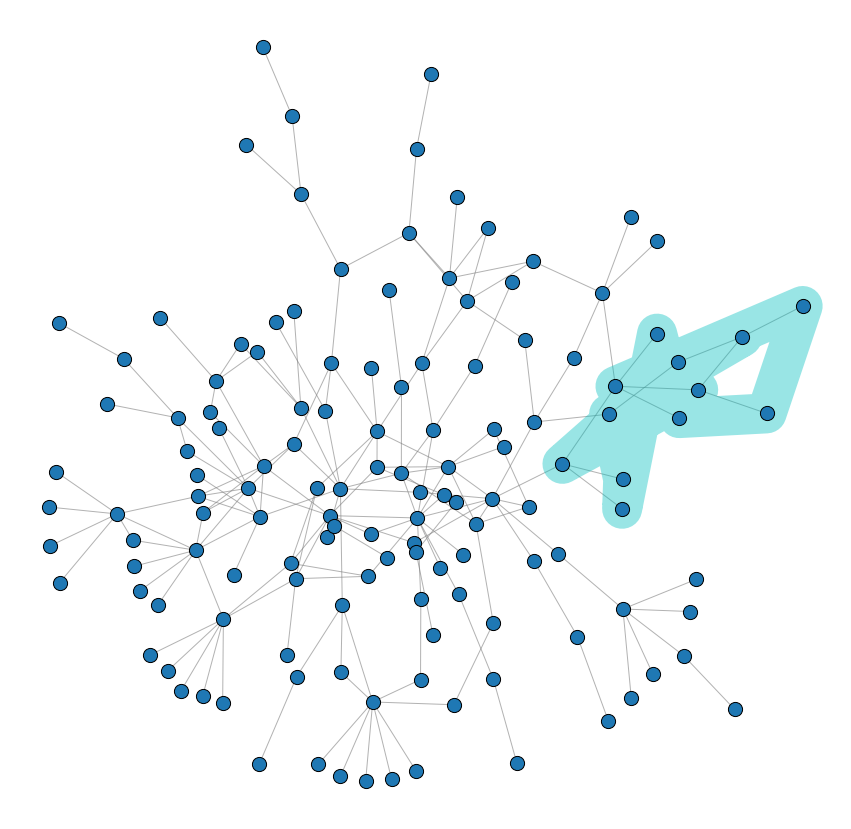

In [15]:
poly = Polygon(area, closed=True, fill=False, ec='c', joinstyle='round', lw=40, alpha=0.4)

plt.figure(figsize=(15,15))
plt.axis('off')
nx.draw_networkx_nodes(GSE4, layout, node_size=200, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='grey',width=1, alpha=0.6)

plt.gca().add_patch(poly)

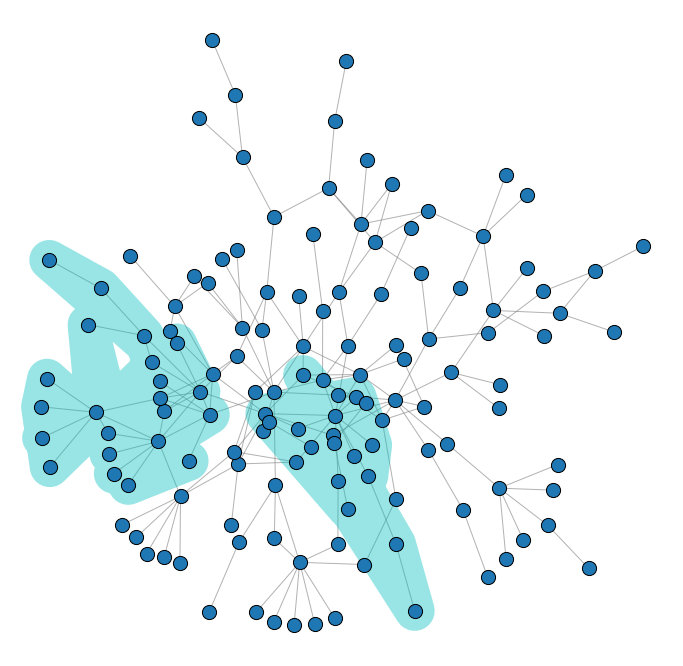

In [16]:
area2 = group_to_area(2, partitions, layout)
area3 = group_to_area(3, partitions, layout)

poly2 = Polygon(area2, closed=True, fill=False, ec='c', joinstyle='round', lw=40, alpha=0.4)
poly3 = Polygon(area3, closed=True, fill=False, ec='c', joinstyle='round', lw=40, alpha=0.4)


plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx_nodes(GSE4, layout, node_size=200, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='grey',width=1, alpha=0.6)

plt.gca().add_patch(poly2)
plt.gca().add_patch(poly3)